In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
mcdonalds = pd.read_csv("/content/sample_data/mcdonalds.csv")

In [5]:
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting  Like  Age      VisitFrequency  Gender  
0         No    -3   61  Every three months  Female  
1         No     2   51  Every three months  Female  
2         No     1   62  Every three months  Female  


In [6]:
md_x = mcdonalds.iloc[:, 0:11].copy()
md_x = (md_x == "Yes").astype(int)


In [7]:
col_means = np.round(md_x.mean(), 2)
print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [8]:
md_pca = PCA()
md_pca.fit(md_x)
print(md_pca.explained_variance_ratio_)
print(md_pca.components_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03

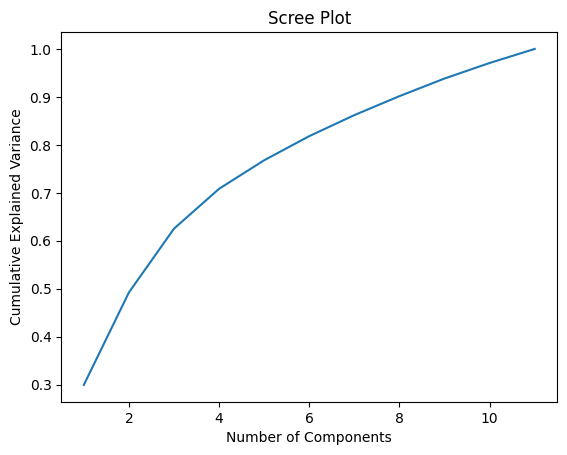

In [9]:
pca = PCA()
pca.fit(md_x)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [10]:
proj_axes = md_pca.transform(md_x)
print(proj_axes)


[[ 0.42536706 -0.21907878  0.6632553  ...  0.18100693  0.51570617
  -0.56707389]
 [-0.21863768  0.38818996 -0.73082668 ...  0.11147641  0.49331285
  -0.50044033]
 [ 0.37541475  0.73043507 -0.12203978 ... -0.32228786  0.06175857
   0.24274108]
 ...
 [-0.18589445  1.06266156  0.22085675 ...  0.03825472  0.05651822
  -0.01279977]
 [-1.18206441 -0.03856977  0.56156066 ...  0.02226748 -0.00257265
  -0.10531631]
 [ 1.55024186  0.27503101 -0.01373727 ... -0.13658866 -0.43279782
  -0.45607556]]


In [11]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(md_x)
labels_kmeans = kmeans.labels_
print(labels_kmeans)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 3 3 ... 3 0 2]


In [12]:
md_x = (md_x == "Yes").astype(int)
md_x = md_x.apply(pd.to_numeric, errors="coerce")
md_x = md_x.dropna()

In [13]:
md_x["Like.n"] = 6 - pd.to_numeric(mcdonalds["Like"])
print(md_x["Like.n"].value_counts())

3     229
4     187
6     169
2     160
5     152
11    152
1     143
9      73
10     71
8      59
7      58
Name: Like.n, dtype: int64


In [14]:
md_x["Like.n"] = 6 - pd.to_numeric(mcdonalds["Like"])
print(md_x["Like.n"].value_counts())


3     229
4     187
6     169
2     160
5     152
11    152
1     143
9      73
10     71
8      59
7      58
Name: Like.n, dtype: int64


In [15]:
formula = "Like.n ~ " + " + ".join(mcdonalds.columns[0:11])
print(formula)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


<Figure size 1300x1100 with 0 Axes>

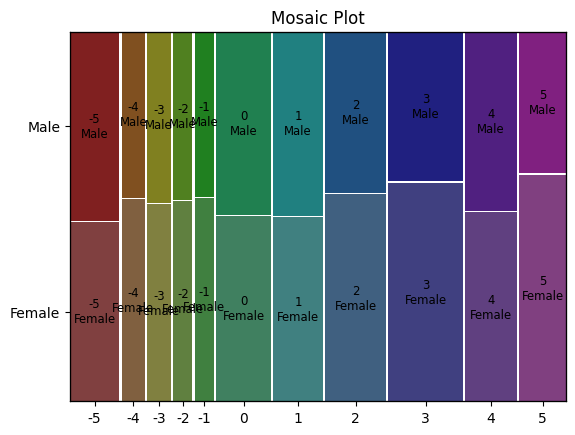

In [16]:
cross_tab = pd.crosstab(mcdonalds["Like"], mcdonalds["Gender"])
plt.figure(figsize=(13, 11))
mosaic(cross_tab.stack(), title='Mosaic Plot')
plt.show()

<Figure size 1000x800 with 0 Axes>

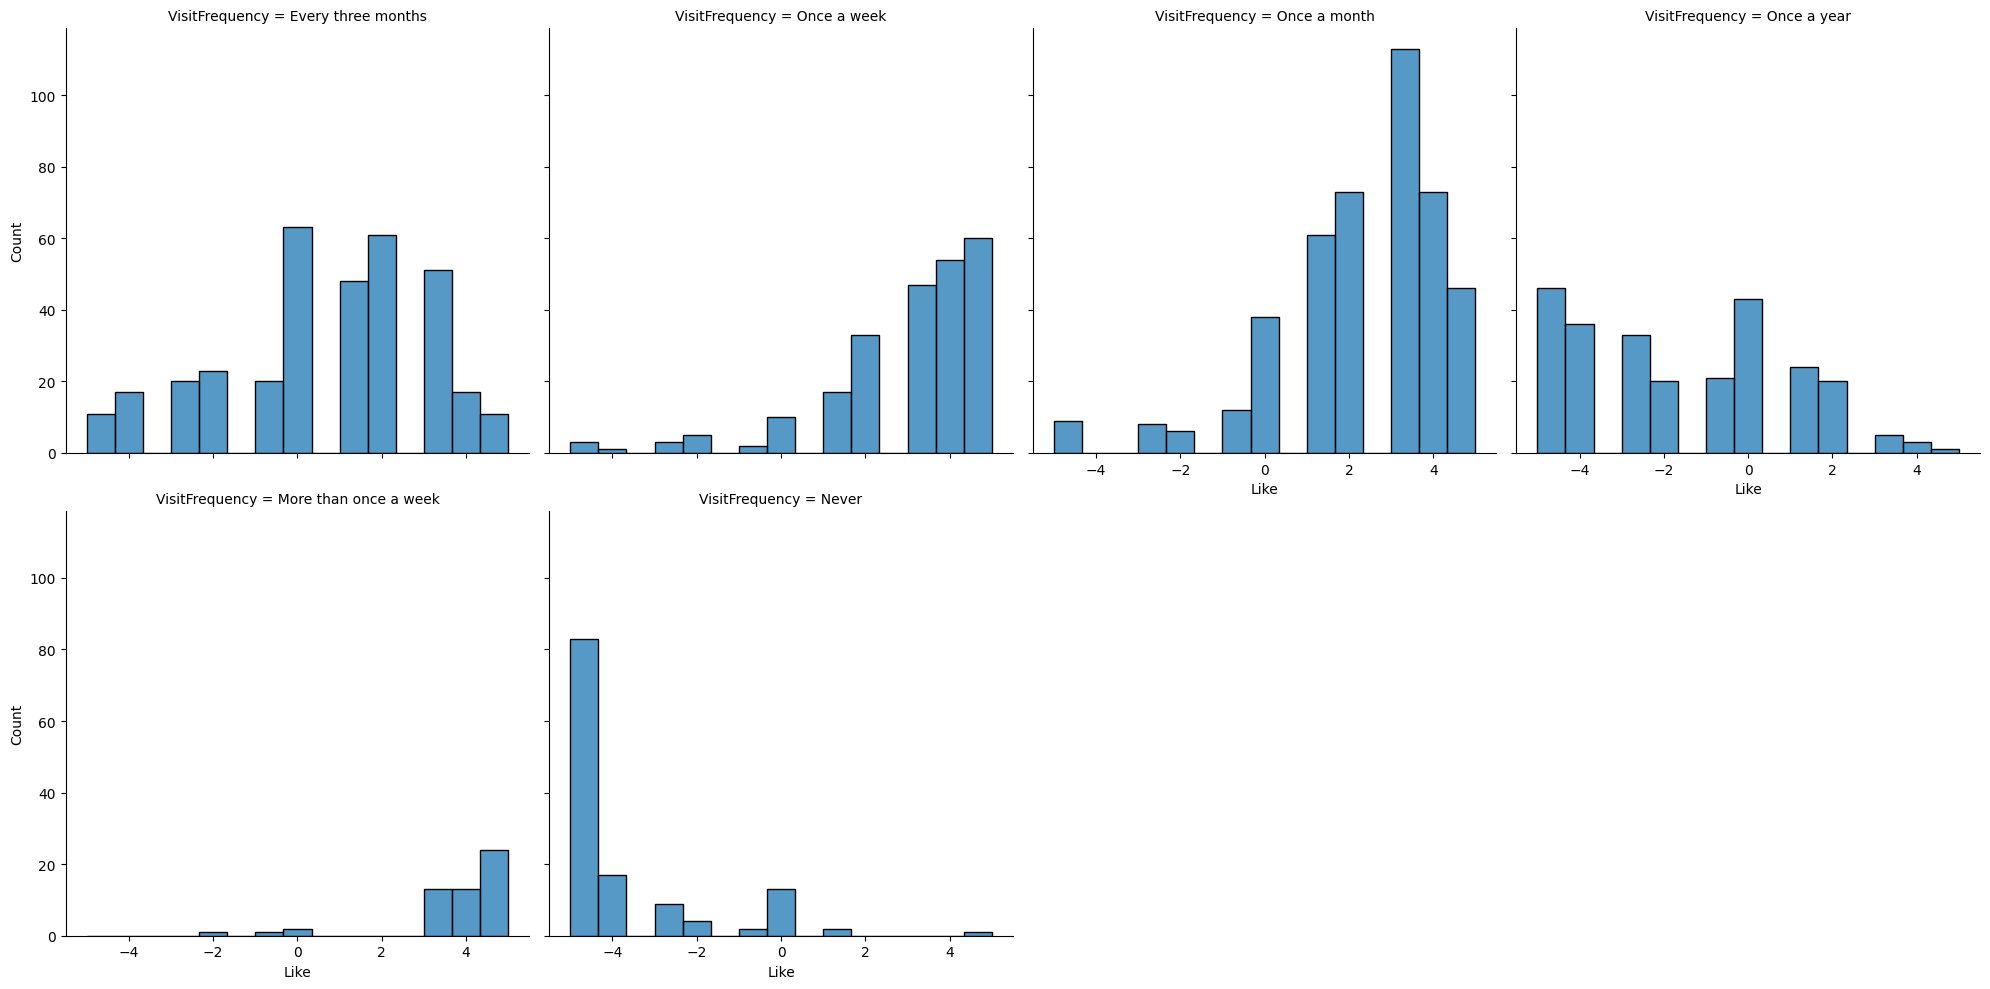

In [17]:
plt.figure(figsize=(10, 8))
sns.displot(data=mcdonalds, x="Like", col="VisitFrequency", col_wrap=4, multiple="stack")
plt.show()

In [18]:
md_reg = KMeans(n_clusters=4, random_state=1234)
print(md_reg)
md_reg.fit(md_x)
md_refit = md_reg.labels_
print(md_refit)

KMeans(n_clusters=4, random_state=1234)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 2 ... 0 3 1]


In [19]:
md_x_t = md_x.T
md_vclust = md_x_t.corr()
print(md_vclust)

md_k4 = KMeans(n_clusters=4, random_state=1234)
md_k4.fit(md_x)
labels_k4 = md_k4.labels_
print(labels_k4)

      0     1     2     3     4     5     6     7     8     9     ...  1443  \
0      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
2      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
3      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
4      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1448   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1449   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1450   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1451   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1452   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   

      1444  1445  1446  1447  1448  1449  1450  145

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 2 ... 0 3 1]
